In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyfolio.timeseries import perf_stats

read backtest results and generate daily returns dataframe

In [2]:
results = pd.read_pickle('results/maximize_return_2007-2012.pickle')

In [3]:
returns = results.returns
returns.tail()

2012-12-24 18:00:00+00:00    0.009366
2012-12-26 21:00:00+00:00    0.007579
2012-12-27 21:00:00+00:00    0.013999
2012-12-28 21:00:00+00:00   -0.006528
2012-12-31 21:00:00+00:00    0.017216
Name: returns, dtype: float64

number of daily return data points:

In [4]:
len(results)

1510

In [5]:
returns.reset_index(drop=True, inplace=True)

# Generate random paths by resampling from returns (with replacements)

change this parameter to get different number of paths

In [6]:
number_of_paths = 250000

In [7]:
simulated_returns = pd.DataFrame(np.random.choice(returns, size=(len(returns), number_of_paths)))

In [8]:
simulated_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,-0.005215,0.007440,0.003215,-0.003561,-0.001166,0.000452,0.019012,-0.004917,-0.003763,0.000433,...,-0.002166,0.004638,-0.023072,0.008597,-0.004490,0.006431,0.002721,-0.024335,0.015621,0.001244
1,-0.007951,0.031780,-0.005106,0.003253,0.000002,-0.007931,0.001815,-0.015408,-0.004850,-0.020234,...,0.018662,0.009116,0.003571,-0.001040,-0.005082,0.016350,-0.007832,0.006435,0.000324,0.003694
2,0.006928,0.027278,-0.015321,-0.011618,-0.001192,0.006421,-0.002094,0.013945,-0.010070,-0.008983,...,-0.003954,-0.007620,0.000452,-0.006348,0.028486,-0.003663,-0.011741,-0.012812,0.008597,0.018795
3,-0.011559,-0.003763,-0.002413,0.006782,0.000384,-0.005575,-0.002390,0.008935,0.001230,-0.003939,...,-0.001192,0.005557,0.014860,0.006350,-0.007167,-0.004712,0.023000,0.001410,-0.000435,-0.007160
4,0.003775,-0.009930,-0.001419,0.006265,0.002887,-0.001654,-0.005793,-0.004036,0.021076,0.010924,...,-0.015195,0.004970,-0.005106,-0.010139,0.008597,0.024029,-0.003486,0.006218,-0.013321,-0.005897


# Quick visual on actual vs. simulated distribution

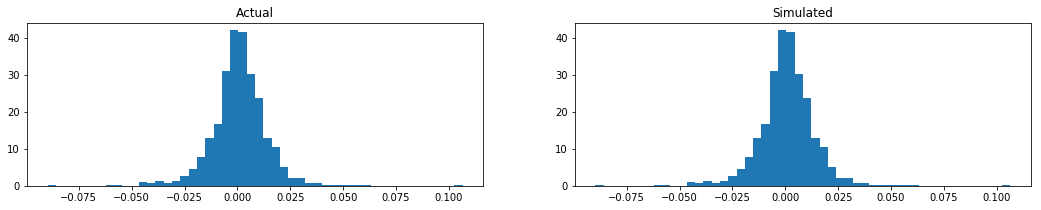

In [9]:
fig = plt.figure(figsize=(18,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(returns, bins=50, density=True)
ax2.hist(simulated_returns.values.flatten(), bins=50, density=True)
ax1.set_title('Actual')
ax2.set_title('Simulated')
plt.show();

# Stats for actual returns

In [10]:
a=perf_stats(returns)
a

Annual return          0.219377
Cumulative returns     2.282038
Annual volatility      0.208470
Sharpe ratio           1.056089
Calmar ratio           1.014580
Stability              0.872539
Max drawdown          -0.216224
Omega ratio            1.210520
Sortino ratio          1.533667
Skew                  -0.158909
Kurtosis               7.375355
Tail ratio             1.036062
Daily value at risk   -0.025391
dtype: float64

# Stats for simulated returns (median, max, min)

In [11]:
ratios_for_paths = pd.DataFrame([perf_stats(x[1]) for x in simulated_returns.T.iterrows()])

median

In [12]:
ratios_for_paths.median().T

Annual return          0.219966
Cumulative returns     2.291562
Annual volatility      0.207966
Sharpe ratio           1.060387
Calmar ratio           0.824654
Stability              0.885127
Max drawdown          -0.265334
Omega ratio            1.211112
Sortino ratio          1.540124
Skew                  -0.179508
Kurtosis               7.057032
Tail ratio             1.051870
Daily value at risk   -0.025330
dtype: float64

max

In [13]:
ratios_for_paths.max().T

Annual return           0.753661
Cumulative returns     27.955944
Annual volatility       0.246625
Sharpe ratio            2.828095
Calmar ratio            6.660052
Stability               0.994400
Max drawdown           -0.096741
Omega ratio             1.674596
Sortino ratio           4.724264
Skew                    1.796320
Kurtosis               16.500395
Tail ratio              1.461571
Daily value at risk    -0.021130
dtype: float64

min

In [14]:
ratios_for_paths.min().T

Annual return         -1.830129e-01
Cumulative returns    -7.021568e-01
Annual volatility      1.786342e-01
Sharpe ratio          -8.419713e-01
Calmar ratio          -2.576715e-01
Stability              1.819809e-08
Max drawdown          -7.842854e-01
Omega ratio            8.597276e-01
Sortino ratio         -1.062492e+00
Skew                  -1.763491e+00
Kurtosis               1.363358e+00
Tail ratio             7.976939e-01
Daily value at risk   -3.056104e-02
dtype: float64

# Probability that max drawdown less than x

In [35]:
x = -.4
len(ratios_for_paths[ratios_for_paths['Max drawdown'] < x]) / number_of_paths

0.076788

# Probability that Sharpe lower than y

In [37]:
y = .5
len(ratios_for_paths[ratios_for_paths['Sharpe ratio'] < y]) / number_of_paths

0.087228

# Probability that annual return less than z

In [39]:
z = .08
len(ratios_for_paths[ratios_for_paths['Annual return'] < z]) / number_of_paths

0.077276

# Some distributions

Max drawdown

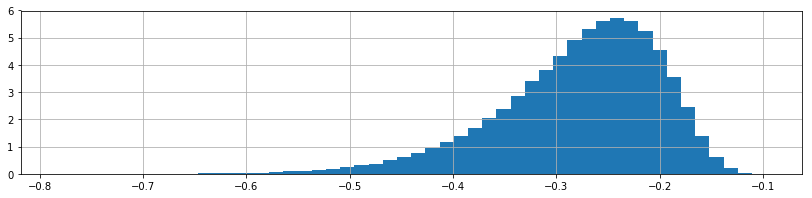

In [18]:
ratios_for_paths['Max drawdown'].hist(bins=50, figsize=(14,3), density=True);

Sharpe

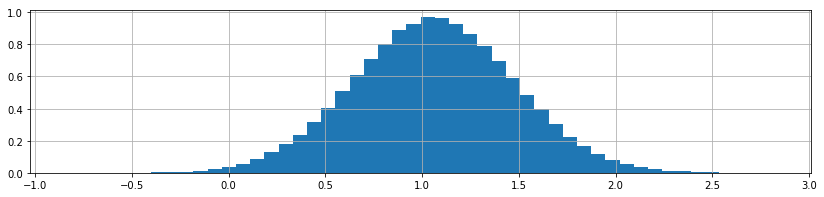

In [19]:
ratios_for_paths['Sharpe ratio'].hist(bins=50, figsize=(14,3), density=True);

Annual return

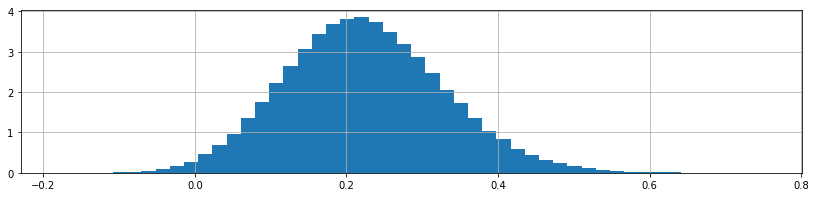

In [20]:
ratios_for_paths['Annual return'].hist(bins=50, figsize=(14,3), density=True);